In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 10,
    width_shift_range=0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")

Found 1466 images belonging to 5 classes.
Found 363 images belonging to 5 classes.


In [10]:
# Nombres y cantidad de categorias
categorias = {v: k for k, v in data_gen_entrenamiento.class_indices.items()}
print('Categorias:', categorias)
num_cat = len(categorias)
print('Numero de categorias: ', num_cat)

Categorias: {0: 'durazno', 1: 'fresa', 2: 'kiwi', 3: 'limon', 4: 'sandia'}
Numero de categorias:  5


In [17]:
# Función para obtener el nombre de la categoría
def obtener_categoria(etiqueta_one_hot):
    
    indice = np.argmax(etiqueta_one_hot)
    
    return categorias.get(indice, "Categoría desconocida")

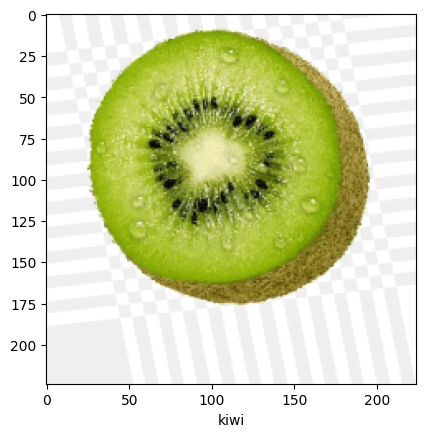

In [20]:
for imagen, etiqueta in data_gen_entrenamiento:
  break

import matplotlib.pyplot as plt

#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen[0])
plt.xlabel(obtener_categoria(etiqueta[0]))
plt.show()

In [ ]:
"""modelo = tf.keras.Sequential([
    #784 datos de entrada
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 = blanco y negro
    # # # Capa oculta
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])"""

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224,224,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(num_cat, activation="softmax")
])

modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [29]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224,224,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(num_cat, activation="softmax")
])

modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
import math

#Entrenar
entrnamiento = modelo.fit(
    data_gen_entrenamiento, 
    validation_data=data_gen_pruebas,
        epochs=10
)

Epoch 1/10
41/46 [=========================>....] - ETA: 5s - loss: 2.4048 - accuracy: 0.3515

C:\Users\Carolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 84s 2s/step - loss: 2.2772 - accuracy: 0.3663 - val_loss: 1.0920 - val_accuracy: 0.5317
Epoch 2/10
45/46 [============================>.] - ETA: 1s - loss: 1.0937 - accuracy: 0.5049

In [14]:
modelo.save('modelo_cnn.h5')

C:\Users\Carolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [ ]:
datos, metadatos = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

In [ ]:
metadatos

In [ ]:
tfds.show_examples(datos["train"], metadatos)

In [ ]:
import matplotlib.pyplot as plt
import cv2 #opencv - trabajar y hacer trnasformaciones en imagenes

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos["train"].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

In [ ]:
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
datos_entrenamiento[0]

In [ ]:
#Preparar variablas X y y

X = []
y = []

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
#Normalizar las imagenes
import numpy as np

X = np.array(X).astype(float) / 255

In [ ]:
X[0]

In [ ]:
y

In [ ]:
y = np.array(y)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
modelo.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
modelo.fit(
    X, y, batch_size=32, validation_split=0.15, epochs=50
)

In [ ]:
#Sobreajuste over-fitting

#Dropout
#Aumento de datos